# Ejercicio de programación Regresión Polinomial

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 Regresión polinomica

Se implementa la regresion polinomial para predecir el la capacidad adquisitiva de una persona. El archivo `Datasets/capacidad_adquisitiva.csv` contiene un dataset para entrenamiento de capacidad adquisitiva de las personas considerando la edad de las personas de la ciudad de Sucre. La primera columna es la edad y la segunda columna es la capacidad adquisitiva en bolivianos por mes.

<a id="section4"></a>
### 2.1 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente.

In [7]:
import numpy as np

# Función para reemplazar comas por puntos y eliminar separadores de miles
def preprocess_line(line):
    # Reemplaza comas por puntos y elimina separadores de miles
    return line.replace('.', '').replace(',', '.')

# Leer el archivo y procesar cada línea
with open('/content/drive/MyDrive/IA/datasets/BOSTON ARREGLADO.txt', 'r') as file:
    # Lee las líneas del archivo
    lines = file.readlines()

    # Preprocesar cada línea
    processed_lines = [preprocess_line(line) for line in lines]

    # Crear un string que representa el archivo procesado
    processed_data = ''.join(processed_lines)

# Convertir el string procesado a un array de numpy
from io import StringIO
data = np.loadtxt(StringIO(processed_data), delimiter='\t', skiprows=1)

# Asignar características y etiquetas
X = data[:, :-1]
y = data[:, -1]
m = y.size

# Imprimir algunos puntos de datos
for i in range(20):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))


    2731      2160
    2729      3470
    3237      3340
    6905      3620
    2985      2870
    8829      2290
   14455      2710
   21124      1650
   17004      1890
   22489      1500
   11747      1890
    9378      2170
   62976      2040
   63796      1820
   62739      1990
  105393      2310
   78420      1750
   80271      2020
   72580      1820
  125179      1360


La desviación estándar es una forma de medir cuánta variación hay en el rango de valores de una característica en particular (la mayoría de los puntos caeran en un rango de ± 2 en relación a la desviaciones estándar de la media); esta es una alternativa a tomar el rango de valores (max-min). En `numpy`, se puede usar la función `std` para calcular la desviacion estandar.

Por ejemplo, la caracteristica`X[:, 0]` contiene todos los valores de $x_1$ (edades) en el conjunto de entrenamiento, entonces `np.std(X[:, 0])` calcula la desviacion estandar de las edades.
En el momento en que se llama a la función `featureNormalize`, la columna adicional de unos correspondiente a $ x_0 = 1 $ aún no se ha agregado a $ X $.

<div class="alert alert-block alert-warning">
**Notas para la implementación:** Cuando se normalize una caracteristica, es importante almacenar los valores usados para la normalización - el valor de la media y el valor de la desviación estandar usado para los calculos. Despues de aprender los parametros del modelo, se deseara predecir la capacidad adquisitiva que no se han visto antes. Dado un nuevo valor de x (edad), primero se debe normalizar x usando la media y la desviacion estandar que se empleo anteriormente en el conjunto de entrenamiento para entrenar el modelo.
</div>
<a id="featureNormalize"></a>

In [8]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


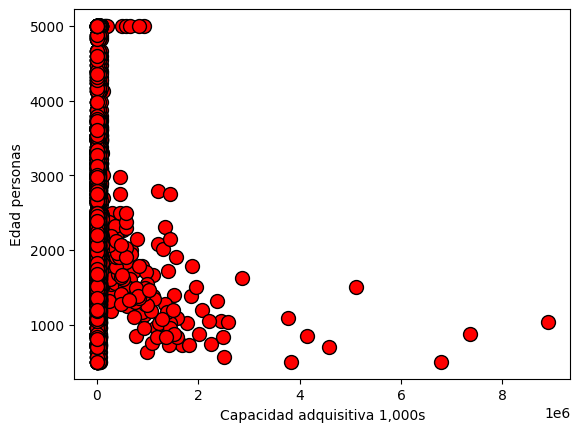

In [9]:
plotData(X, y)

In [10]:
X = np.concatenate([X, X * X], axis=1)

In [11]:
print(X)

[[2.73100000e+03 0.00000000e+00 7.07000000e+03 ... 3.16840000e+06
  1.57529610e+09 8.35396000e+05]
 [2.72900000e+03 0.00000000e+00 7.07000000e+03 ... 3.16840000e+06
  1.54315409e+09 1.62409000e+05]
 [3.23700000e+03 0.00000000e+00 2.18000000e+03 ... 3.49690000e+06
  1.55732837e+09 8.64360000e+04]
 ...
 [6.07600000e+03 0.00000000e+00 1.19300000e+04 ... 4.41000000e+06
  1.57529610e+09 3.18096000e+05]
 [1.09590000e+04 0.00000000e+00 1.19300000e+04 ... 4.41000000e+06
  1.54802902e+09 4.19904000e+05]
 [4.74100000e+03 0.00000000e+00 1.19300000e+04 ... 4.41000000e+06
  1.57529610e+09 6.20944000e+05]]


In [12]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [13]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

#print(X)
#print('Media calculada:', mu)
#print('Desviación estandar calculada:', sigma)
#print(X_norm)

Despues de `featureNormalize` la funcion es provada, se añade el temino de interseccion a `X_norm`:

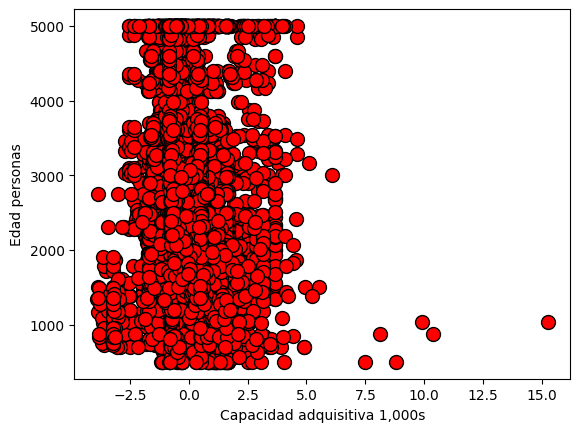

In [14]:
plotData(X_norm, y)

In [15]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
#X_norm = np.concatenate([X_norm, X_norm * X_norm], axis=1)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [16]:
print(X)

[[ 1.         -0.41783001 -0.48671582 ... -0.3763877   0.52699302
  -0.54181569]
 [ 1.         -0.41783233 -0.48671582 ... -0.3763877   0.45013388
  -0.82708099]
 [ 1.         -0.41724164 -0.48671582 ...  0.05495693  0.48402793
  -0.85928438]
 ...
 [ 1.         -0.41394049 -0.48671582 ...  1.25392431  0.52699302
  -0.76108849]
 [ 1.         -0.40826261 -0.48671582 ...  1.25392431  0.461791
  -0.71793418]
 [ 1.         -0.41549281 -0.48671582 ...  1.25392431  0.52699302
  -0.63271747]]


<a id="section5"></a>
### 2.2 Descenso por el gradiente

En el ejemplo anterior se implemento el descenso por el gradiente para un problema de regresion univariable. La unica diferencia es que ahora existe una caracteristica adicional en la matriz $X$. La función de hipótesis y la regla de actualización del descenso del gradiente por lotes permanecen sin cambios.

La implementacion de las funciones `computeCostMulti` y `gradientDescentMulti` son similares a la funcion de costo y función de descenso por el gradiente de la regresión lineal multiple es similar al de la regresion lineal multivariable. Es importante garantizar que el codigo soporte cualquier numero de caracteristicas y esten bien vectorizadas.

Se puede utilizar `shape`, propiedad de los arrays `numpy`, para identificar cuantas caracteristicas estan consideradas en el dataset.

<div class="alert alert-block alert-warning">
**Nota de implementación:** En el caso de multivariables, la función de costo puede se escrita considerando la forma vectorizada de la siguiente manera:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

donde:

$$ X = \begin{pmatrix}
- (x^{(1)})^T - \\
- (x^{(2)})^T - \\
\vdots \\
- (x^{(m)})^T - \\ \\
\end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

La version vectorizada es eficiente cuando se trabaja con herramientas de calculo numericos computacional como `numpy`.
</div>

<a id="computeCostMulti"></a>

In [17]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [33]:
import numpy as np
import matplotlib.pyplot as pyplot

# Función de cálculo del costo
def calcularCosto(X, y, theta):
    m = y.size
    h = np.dot(X, theta)  # Calcula las predicciones
    J = (1 / (2 * m)) * np.sum(np.square(h - y))  # Calcula el costo
    return J

# Función de descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = []

    for i in range(num_iters):
        h = np.dot(X, theta)  # Calcula las predicciones
        # Actualiza theta
        theta -= (alpha / m) * np.dot(X.T, (h - y))
        J_history.append(calcularCosto(X, y, theta))  # Guarda el costo

    return theta, J_history


In [34]:
if X.shape[1] != theta.size:
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)

#### 3.2.1 Seleccionando coheficientes de aprendizaje


In [43]:

import numpy as np

# Suponiendo que mu y sigma son arrays con 30 elementos
# y X_array debe tener el mismo número de elementos que theta

# Inicializa X_array con un término de sesgo y otras características
X_array = np.zeros(30)  # Crear un array con 30 elementos

# Definir características específicas y normalizarlas
# Asegúrate de que las características que normalizas corresponden con mu y sigma
X_array[0] = 1  # Término de sesgo
X_array[1] = (23 - mu[1]) / sigma[1]  # Normalizar característica 1
X_array[2] = (529 - mu[2]) / sigma[2]  # Normalizar característica 2

# Asegúrate de que `X_array` tiene la misma longitud que `theta`
if X_array.size != theta.size:
    raise ValueError(f"El tamaño de X_array ({X_array.size}) no coincide con el tamaño de theta ({theta.size})")

# Realiza la predicción
price = np.dot(X_array, theta)
print(f'La capacidad adquisitiva para una persona con características normalizadas es: ${price:.0f}')


La capacidad adquisitiva para una persona con características normalizadas es: $-579


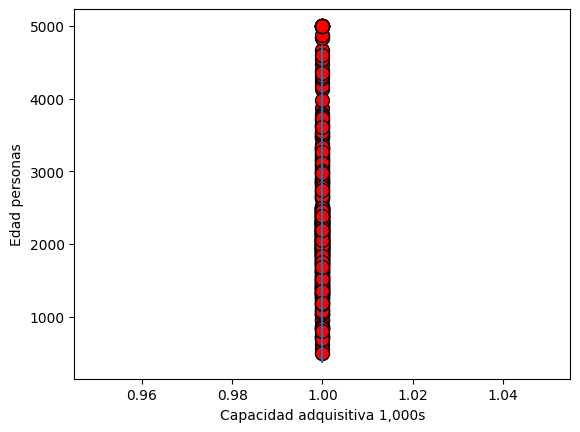

In [44]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')

In [47]:


mu = np.array([1.0, 2.0, 3.0, 4.0])  # Ejemplo de valores para mu
sigma = np.array([1.0, 1.0, 1.0, 1.0])  # Ejemplo de valores para sigma

# Datos de ejemplo
X_array = np.array([1, 23, 529])

# Normaliza solo las características relevantes
X_array[1:3] = (X_array[1:3] - mu[1:3]) / sigma[1:3]


In [50]:
X_array = np.zeros(30)  # Ajusta el tamaño de acuerdo con theta

# Ejemplo de datos: 23 y 529 como características que se deben normalizar
X_array[0] = 1  # Término de sesgo (si se usa en el modelo)
X_array[1] = (23 - mu[1]) / sigma[1]  # Normalización
X_array[2] = (529 - mu[2]) / sigma[2]  # Normalización

# Rellena el resto de X_array con ceros o valores relevantes si es necesario

# Realiza la predicción
price = np.dot(X_array, theta)
print(f'LA MEDV: ${price:.0f}')


LA MEDV: $308660


<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Una manera de calcular rapidamente el modelo de una regresion lineal es:

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Utilizando esta formula no requiere que se escale ninguna caracteristica, y se obtendra una solucion exacta con un solo calculo: no hay “bucles de convergencia” como en el descenso por el gradiente.

Primero se recargan los datos para garantizar que las variables no esten modificadas. Recordar que no es necesario escalar las caracteristicas, se debe agregar la columna de unos a la matriz $X$ para tener el termino de intersección($\theta_0$).

In [55]:
import pandas as pd

# Leer el archivo con pandas para manejar el formato de los números
data = pd.read_csv('/content/drive/MyDrive/IA/datasets/BOSTON ARREGLADO.txt', delimiter='\t', skiprows=1)

# Reemplazar comas por puntos en todo el DataFrame
data = data.replace({',': '.'}, regex=True)

# Convertir a tipo numérico, forzando errores a NaN (no números)
data = data.apply(pd.to_numeric, errors='coerce')

# Asignar características y etiquetas
X = data.iloc[:, :-1].values  # Todas las columnas excepto la última
y = data.iloc[:, -1].values   # Última columna
m = y.size

# Agregar características cuadráticas y término de sesgo
X_original = X.copy()
X = np.concatenate([X, X ** 2], axis=1)  # Agregar características cuadráticas
X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar el término de sesgo

print(X[:5])  # Mostrar las primeras filas para verificar


[[1.00000000e+00 2.72900000e-02 0.00000000e+00 7.07000000e+00
  0.00000000e+00 4.69000000e-01 7.18500000e+01 6.11000000e+01
  4.96710000e+01 2.00000000e+00 2.42000000e+02 1.78000000e+01
  3.92830000e+02 4.03000000e+00 7.44744100e-04 0.00000000e+00
  4.99849000e+01 0.00000000e+00 2.19961000e-01 5.16242250e+03
  3.73321000e+03 2.46720824e+03 4.00000000e+00 5.85640000e+04
  3.16840000e+02 1.54315409e+05 1.62409000e+01]
 [1.00000000e+00 3.23700000e-02 0.00000000e+00 2.18000000e+00
  0.00000000e+00 4.58000000e-01 6.99800000e+01 4.58000000e+01
  6.06220000e+01 3.00000000e+00 2.22000000e+02 1.87000000e+01
  3.94630000e+02 2.94000000e+00 1.04781690e-03 0.00000000e+00
  4.75240000e+00 0.00000000e+00 2.09764000e-01 4.89720040e+03
  2.09764000e+03 3.67502688e+03 9.00000000e+00 4.92840000e+04
  3.49690000e+02 1.55732837e+05 8.64360000e+00]
 [1.00000000e+00 6.90500000e-02 0.00000000e+00 2.18000000e+00
  0.00000000e+00 4.58000000e-01 7.14700000e+01 5.42000000e+01
  6.06220000e+01 3.00000000e+00 2.22

In [56]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [62]:

theta = normalEqn(X, y)

# Mostrar los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print(f'Theta calculado a partir de la ecuación de la normal: {theta}')

# Estimar el precio para una casa con características específicas
X_array = np.array([1, 20, 400, 20**2, 400**2, 20 * 400])  # Ajusta según las características

# Verificar el tamaño de X_array
print(f'Tamaño de X_array: {X_array.size}')

# Realizar la predicción solo si el tamaño coincide
if X_array.size == theta.size:
    price = np.dot(X_array, theta)
    print(f'Precio predicho para una casa de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${price:.0f}')
else:
    print("El tamaño de X_array no coincide con el tamaño de theta. Verifica las características y el término de sesgo.")

Theta calculado a partir de la ecuación de la normal: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
Tamaño de X_array: 6
El tamaño de X_array no coincide con el tamaño de theta. Verifica las características y el término de sesgo.


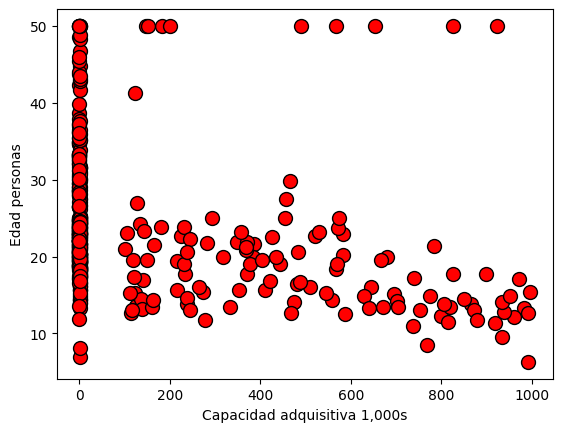

In [63]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')